# TP4 : K-nearest neighbours & cython
# SDIA - Python 
## Adrien HANS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Classification using K-nearest neighbours algorithm

This practical is a first introduction to classification using the most intuitive non parametric method : K nearest neighbours. The principle is the following. A set of labelled observations which can belong to 2 classes is given as a learning set. Then new observations must be classified as either of class 1 or 2. The principle of K-NN is to label a new observation from the most frequent label among its K nearest neighbours.

### Exercise 1 : * Using synthetic data*



Load the training and test data sets synth_train.txt and synth_test.txt. Targets belong to {1,2} and entries belong to $\mathbb{R}^2$. We have 100 training data samples and 200 test samples.
    * the 1st column contains the label of the class the sample,
    * columns 2 & 3 contain the coordinates of each sample in 2D.







We load the training and test sets :

In [2]:
# load the training set
train = np.loadtxt('synth_train.txt') 
#...,delimiter=',') if there are ',' as delimiters
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]

In [99]:
# load the test set
test = np.loadtxt('synth_test.txt')
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
x_test = test[:,1:]
N_test = test.shape[0]

### TO DO:
    a. Display the training set and distinguish the two classes. The function scatter can be useful.
    b. Implement the K-nearest neighbours algorithm for classification.
    c. Compute the error rate on the training set and the test set for K = 1,...,30.
    d. Comment on your results. Which value of K seems optimal ?

_Indication 1:_ Python functions to sort, norm and replicate (see `tile()`) matrices may be useful to compute and sort distances to a given data point while limiting the number of loops 'for'.

_Indication 2:_ if class_pred contains the predicted labels for N_test samples, one can display classification results by using:

#### a.  Display the training set and distinguish the two classes. The function scatter can be useful.
We display the training data : 

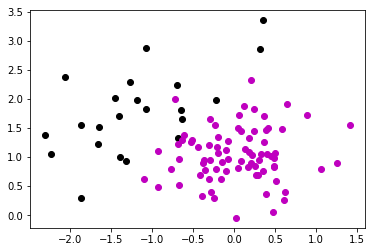

In [4]:
plt.figure()
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko') # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo') # class 2 in magenta
plt.show()

#### b. Implement the K-nearest neighbours algorithm for classification.

Firstly, we implement a function giving the euclidean distance between two points : 

\begin{align*}
EuclideanDistance(a,b)=\sqrt{\sum_{i=1}^{n}(a_i-b_i)^2}
\end{align*}

In [55]:
def euclid(point1, point2):
    return np.sqrt(((point1[1:]-point2[1:])**2).sum())

Secondly, we implement the function knn to compute the K-nearest neighbours algorithm for classification : 

In [64]:
import operator

#The function getNeighbours permits to get the k neighbours of a test_set
def getNeighbours(training, test, k):
    
    distances = []
    neighbours = []

    for x in training:  
        
        dist = euclid(test, x)
        distances.append((x, dist))
        sorted_distances=sorted(distances,key=operator.itemgetter(1))
    for x in range(k):
        neighbours.append(sorted_distances[x][0])
    return np.array(neighbours)


def KNN(train,test,k):
    neighbours=np.array(getNeighbours(train,test,k))
    sorted_neighbours=np.sort(neighbours[:,0])
    cat=list(set(sorted_neighbours))
    votes=np.array([[c,len(sorted_neighbours[sorted_neighbours==c])] for c in cat])
    result=sorted(votes,key=operator.itemgetter(1),reverse=True)[0][0]
    return result

#### c. Compute the error rate on the training set and the test set for K = 1,...,30.

In [75]:
List_error=[]
n=30
result=0

for k in range(1,n+1):
    nb_errors=0
    for x in test:
        result=KNN(train,x,k)
        if result != x[0]:
            nb_errors+=1
    List_error.append((1-(nb_errors/N_test)) * 100)

We plot the results : 

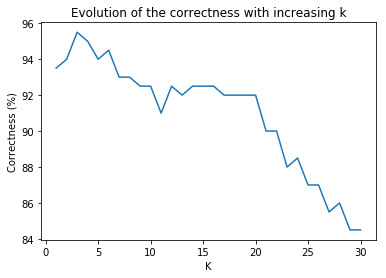

In [87]:
plt.plot([k for k in range(1,n+1)],List_error)
plt.title('Evolution of the correctness with increasing k')
plt.ylabel('Correctness (%)')
plt.xlabel('K')
plt.show()

We show the values in a table : 

In [94]:
for k in range(1,n+1):
    print('k = ', k, 'Correctness = ',List_error[k-1] )

k =  1 Correctness =  93.5
k =  2 Correctness =  94.0
k =  3 Correctness =  95.5
k =  4 Correctness =  95.0
k =  5 Correctness =  94.0
k =  6 Correctness =  94.5
k =  7 Correctness =  93.0
k =  8 Correctness =  93.0
k =  9 Correctness =  92.5
k =  10 Correctness =  92.5
k =  11 Correctness =  91.0
k =  12 Correctness =  92.5
k =  13 Correctness =  92.0
k =  14 Correctness =  92.5
k =  15 Correctness =  92.5
k =  16 Correctness =  92.5
k =  17 Correctness =  92.0
k =  18 Correctness =  92.0
k =  19 Correctness =  92.0
k =  20 Correctness =  92.0
k =  21 Correctness =  90.0
k =  22 Correctness =  90.0
k =  23 Correctness =  88.0
k =  24 Correctness =  88.5
k =  25 Correctness =  87.0
k =  26 Correctness =  87.0
k =  27 Correctness =  85.5
k =  28 Correctness =  86.0
k =  29 Correctness =  84.5
k =  30 Correctness =  84.5


####  d. Comment on your results. Which value of K seems optimal ?
The correctness increases up to 95.5% at K=3 and then decreases down to 84.5% for k=30. 

Thus, the optimal value of K seems then to be K=3. 

### 2.  Application to a real data set : Breast cancer Wisconsin
